In [60]:
import pandas as pd

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import preprocessing 
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [62]:
df= pd.read_csv("dataforclass.csv")

In [63]:
df.head()

,crmrte,prbarr,prbconv,prbpris,polpc,density,urban,awage,lawage,crime
0,0.039885,0.289696,0.402062,0.472222,0.001787,2.307159,0,257.4241,5.550725,1
1,0.038345,0.338111,0.433005,0.506993,0.001767,2.330254,0,272.7497,5.608555,1
2,0.030305,0.330449,0.525703,0.479705,0.001836,2.341801,0,396.5378,5.982771,0
3,0.034726,0.362525,0.604706,0.520104,0.001886,2.346420,0,299.1779,5.701038,1
4,0.036573,0.325395,0.578723,0.497059,0.001924,2.364896,0,312.5454,5.744750,1


In [64]:
df.columns

Index(['crmrte', 'prbarr', 'prbconv', 'prbpris', 'polpc', 'density', 'urban',
       'awage', 'lawage', 'crime'],
      dtype='object')

In [65]:
df.shape

(630, 10)

In [66]:
df.describe()

,crmrte,prbarr,prbconv,prbpris,polpc,density,urban,awage,lawage,crime
count,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,0.031588,0.307368,0.688618,0.425518,0.001917,1.386062,0.088889,287.252366,5.645461,0.384127
std,0.018121,0.171205,1.690345,0.087245,0.002735,1.439703,0.284809,52.089845,0.169575,0.486775
min,0.001812,0.058824,0.068376,0.148936,0.000458,0.197719,0.000000,194.567500,5.270779,0.000000
25%,0.018352,0.217902,0.347692,0.374403,0.001191,0.532944,0.000000,251.727075,5.528345,0.000000
50%,0.028441,0.278240,0.474375,0.428571,0.001451,0.952595,0.000000,279.948650,5.634606,0.000000
75%,0.038406,0.352518,0.635597,0.483189,0.001803,1.507818,0.000000,313.312025,5.747200,1.000000
max,0.163835,2.750000,37.000000,0.678571,0.035578,8.827652,1.000000,584.949900,6.371526,1.000000


In [67]:
df.describe


<bound method NDFrame.describe of        crmrte    prbarr   prbconv   prbpris     polpc   density  urban  \
0    0.039885  0.289696  0.402062  0.472222  0.001787  2.307159      0   
1    0.038345  0.338111  0.433005  0.506993  0.001767  2.330254      0   
2    0.030305  0.330449  0.525703  0.479705  0.001836  2.341801      0   
3    0.034726  0.362525  0.604706  0.520104  0.001886  2.346420      0   
4    0.036573  0.325395  0.578723  0.497059  0.001924  2.364896      0   
..        ...       ...       ...       ...       ...       ...    ...   
625  0.015575  0.226667  0.480392  0.428571  0.001073  0.869048      0   
626  0.013662  0.204188  1.410260  0.372727  0.001109  0.872024      0   
627  0.013086  0.180556  0.830769  0.333333  0.001054  0.875000      0   
628  0.012874  0.112676  2.250000  0.244444  0.001088  0.880952      0   
629  0.014193  0.207595  1.182930  0.360825  0.001186  0.889881      0   

        awage    lawage  crime  
0    257.4241  5.550725      1  
1    272.74

In [68]:
df.isnull().sum

<bound method DataFrame.sum of      crmrte  prbarr  prbconv  prbpris  polpc  density  urban  awage  lawage  \
0     False   False    False    False  False    False  False  False   False   
1     False   False    False    False  False    False  False  False   False   
2     False   False    False    False  False    False  False  False   False   
3     False   False    False    False  False    False  False  False   False   
4     False   False    False    False  False    False  False  False   False   
..      ...     ...      ...      ...    ...      ...    ...    ...     ...   
625   False   False    False    False  False    False  False  False   False   
626   False   False    False    False  False    False  False  False   False   
627   False   False    False    False  False    False  False  False   False   
628   False   False    False    False  False    False  False  False   False   
629   False   False    False    False  False    False  False  False   False   

     crime  
0    Fa

<AxesSubplot:>

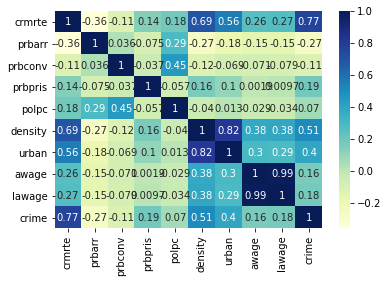

In [69]:
sn.heatmap(df.corr(),cmap='YlGnBu',annot=True)

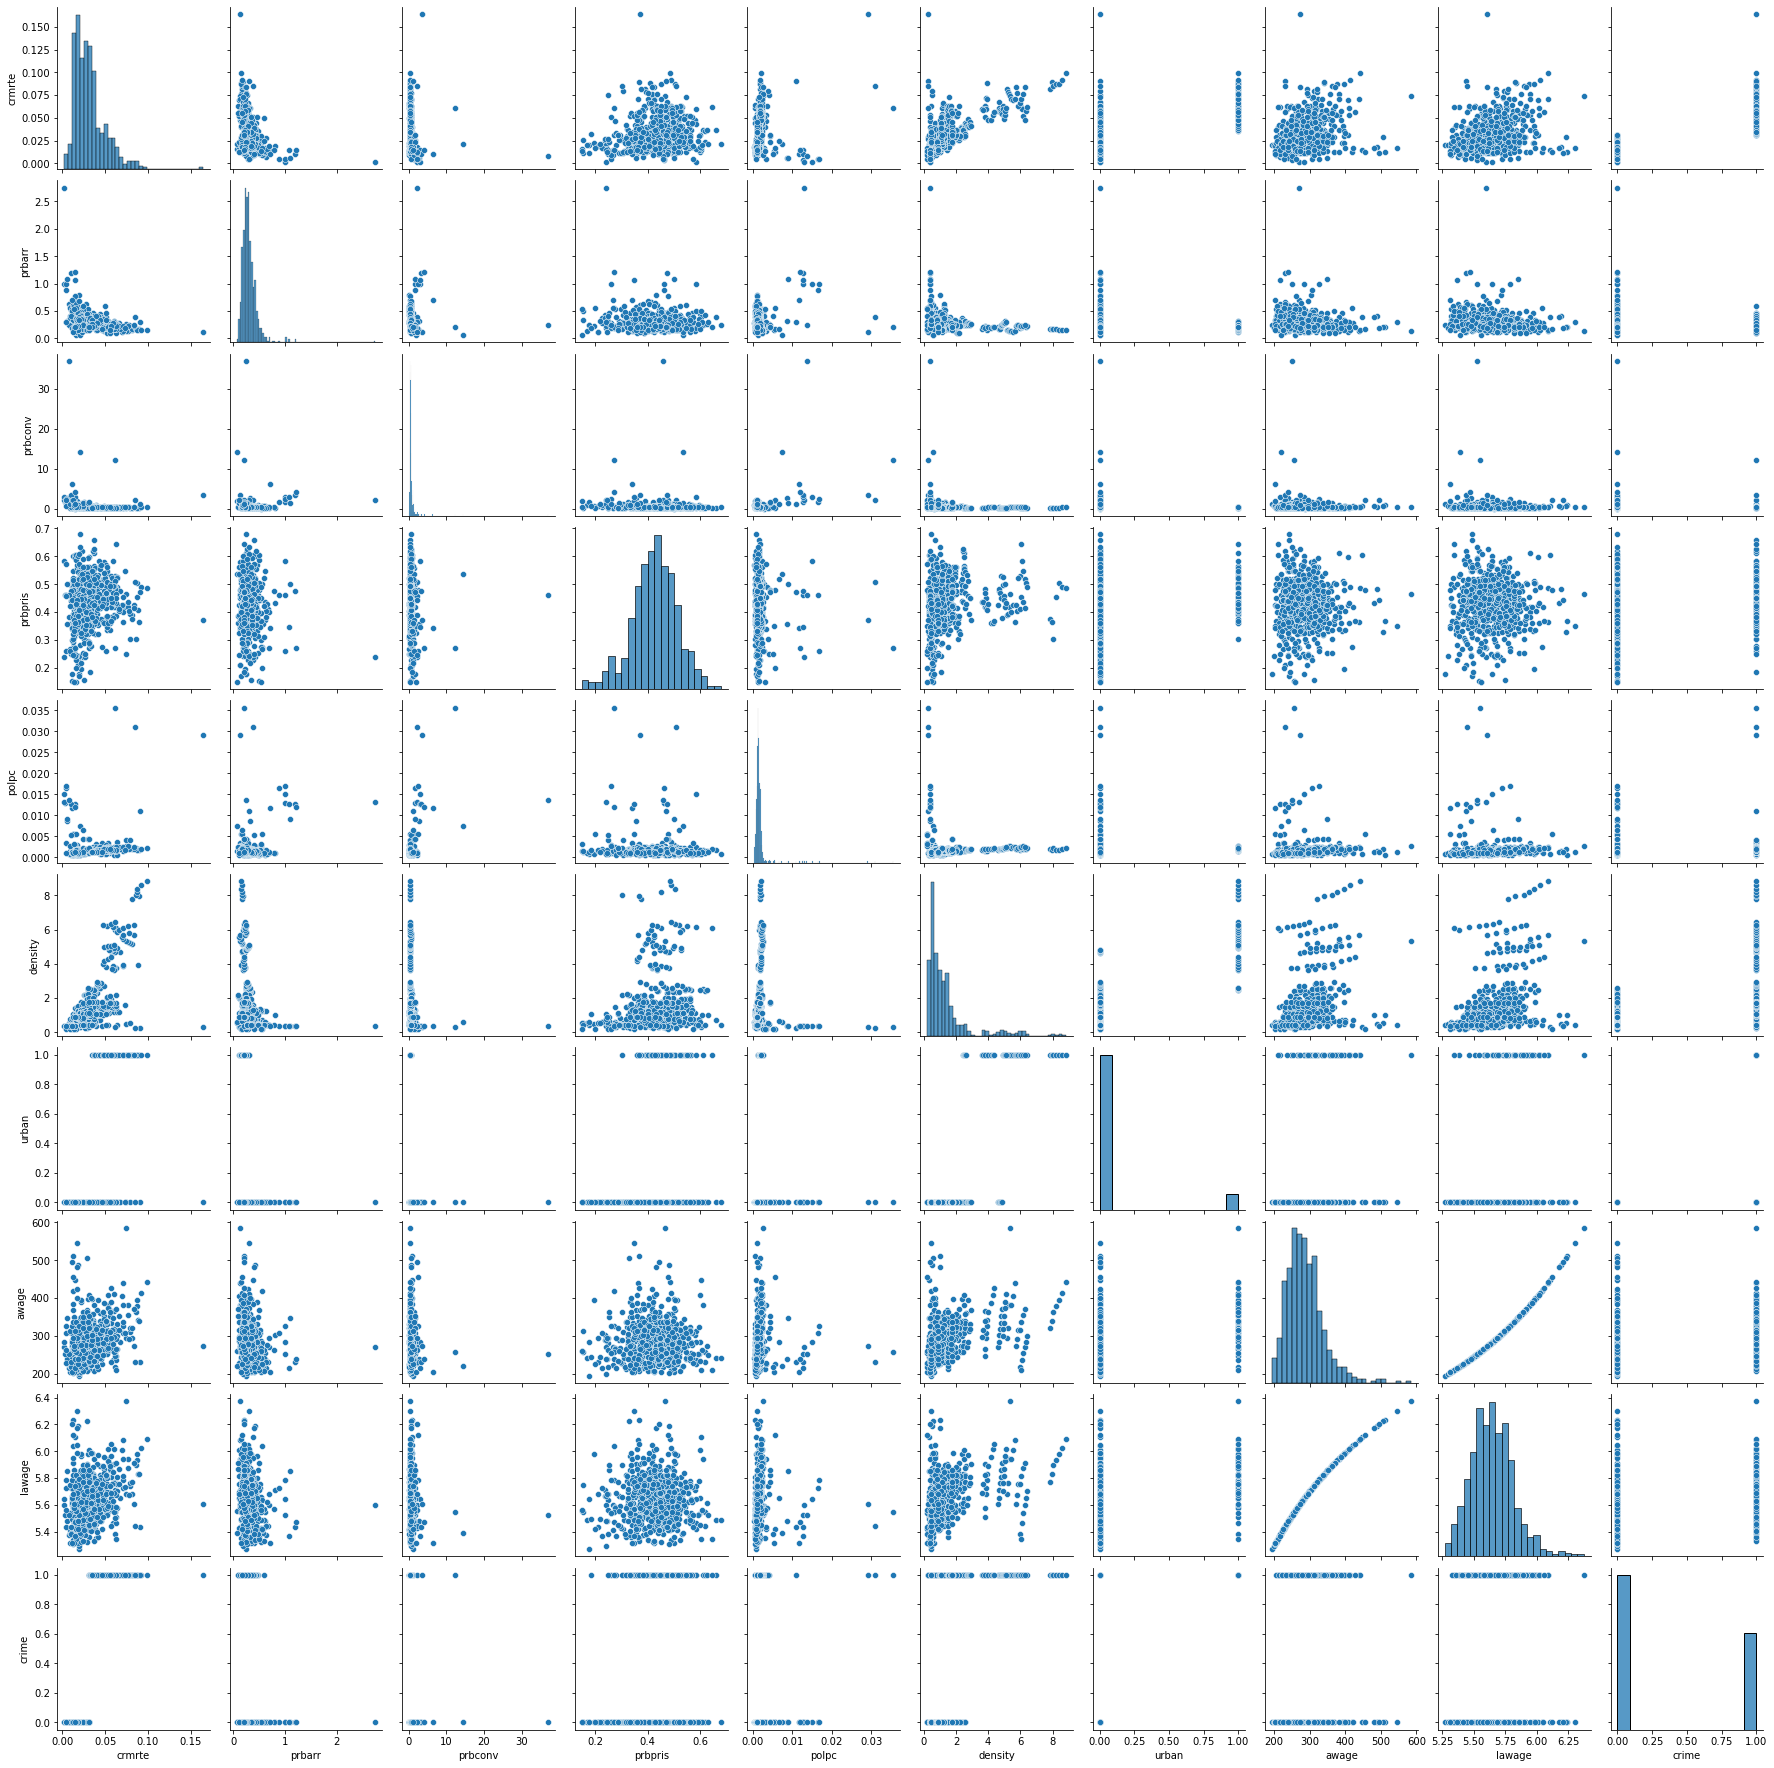

In [26]:
sn.pairplot(df)

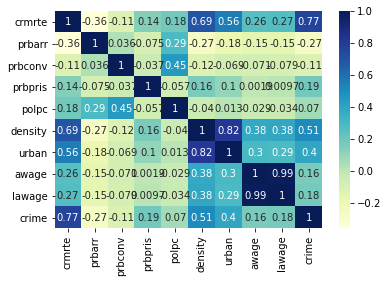

In [70]:
sn.heatmap(df.corr(),cmap='YlGnBu',annot=True);

# simple linear regression

In [79]:
#Y= aX+b
y=df['crmrte']
x=df['density']

In [80]:
#crmte=a*density+b
#splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=100)

In [81]:
x_test

396    6.070270
136    1.814103
388    1.298148
75     2.579666
471    1.200253
         ...   
129    0.714286
190    0.500610
240    0.620301
100    0.509346
254    0.769337
Name: density, Length: 252, dtype: float64

In [82]:
x_train_sm = sm.add_constant(x_train)

In [83]:
#OlS model
crime_fr= sm.OLS(y_train, x_train_sm).fit()

In [85]:
crime_fr.params

const      0.019380
density    0.008522
dtype: float64

In [86]:
crime_fr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crmrte   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     312.8
Date:                Sat, 17 Jun 2023   Prob (F-statistic):           2.31e-51
Time:                        12:17:40   Log-Likelihood:                 1091.1
No. Observations:                 378   AIC:                            -2178.
Df Residuals:                     376   BIC:                            -2170.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0194      0.001     20.024      0.000       0.017       0.021
density        0.0085      0.000     17.685      0.000       0.008       0.009
==============================================================================
Omnibus:                      360.906   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17531.876
Skew:                           3.851   Prob(JB):                         0.00
Kurtosis:                      35.463   Cond. No.                         3.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

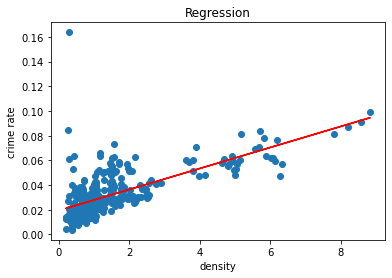

In [92]:
#Ploting the regression line
plt.scatter(x_train,y_train)
plt.plot(x_train,0.019380+0.008522*x_train,'r');
plt.title('Regression')
plt.xlabel('density')
plt.ylabel('crime rate')
plt.show()

In [94]:
#generating the residuals
yhat=crime_fr.predict(x_train_sm)
error=(y_train-yhat)
error

7     -0.011313
556   -0.000734
302   -0.004133
420   -0.009250
66    -0.009995
         ...   
578   -0.006655
53    -0.005968
350   -0.017274
79    -0.003276
520    0.013865
Length: 378, dtype: float64

<Figure size 432x288 with 0 Axes>

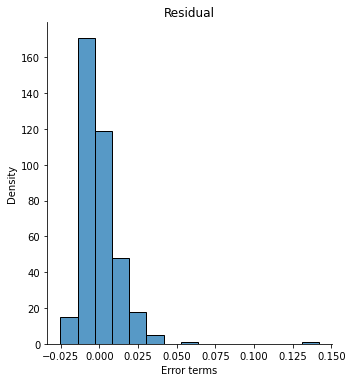

In [97]:
#plotting the error
fig=plt.figure()
sn.displot(error,bins=15)
plt.title('Residual')
plt.xlabel('Error terms')
plt.ylabel('Density')
plt.show()

In [101]:
#Testing the Model
x_test_sm=sm.add_constant(x_test)
y_test_pred= crime_fr.predict(x_test_sm)
y_test_pred

396    0.071111
136    0.034840
388    0.030443
75     0.041364
471    0.029609
         ...   
129    0.025467
190    0.023646
240    0.024666
100    0.023721
254    0.025936
Length: 252, dtype: float64

In [105]:
r2= r2_score(y_test,y_test_pred)
round(r2,2)*100

52.0